# Extra: Fbrophet

<img src='../img/fbprophet.webp'>

<h4>Referências</h4>

https://medium.com/analytics-vidhya/how-does-prophet-work-44addaab6148<br>
https://medium.com/analytics-vidhya/how-does-prophet-work-part-2-c47a6ceac511

<h4>Data Base</h4>

http://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('../data/occupancy_data/datatraining.txt')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [4]:
df_train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


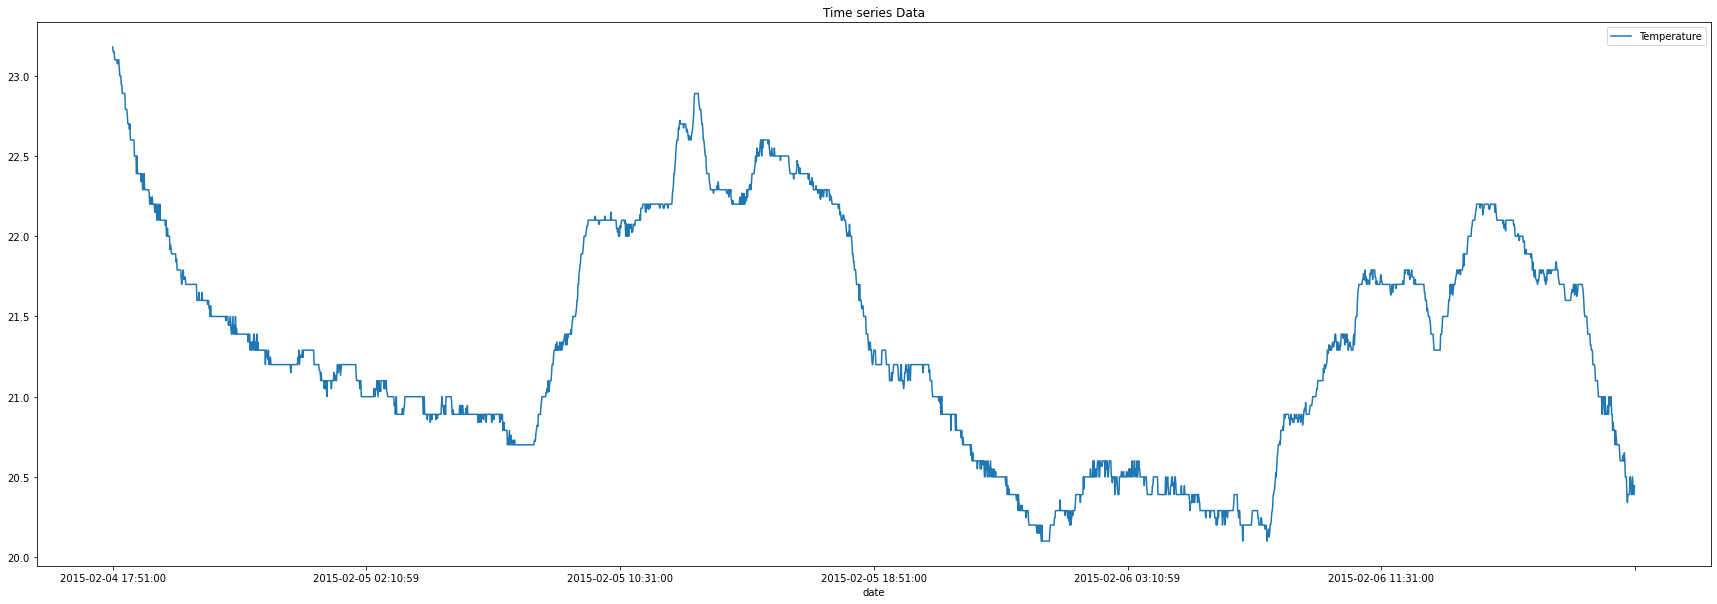

In [5]:
# plotting the time series data
df_train.loc[:3000].plot(x='date', y='Temperature', figsize=(30, 10), title='Time series Data');

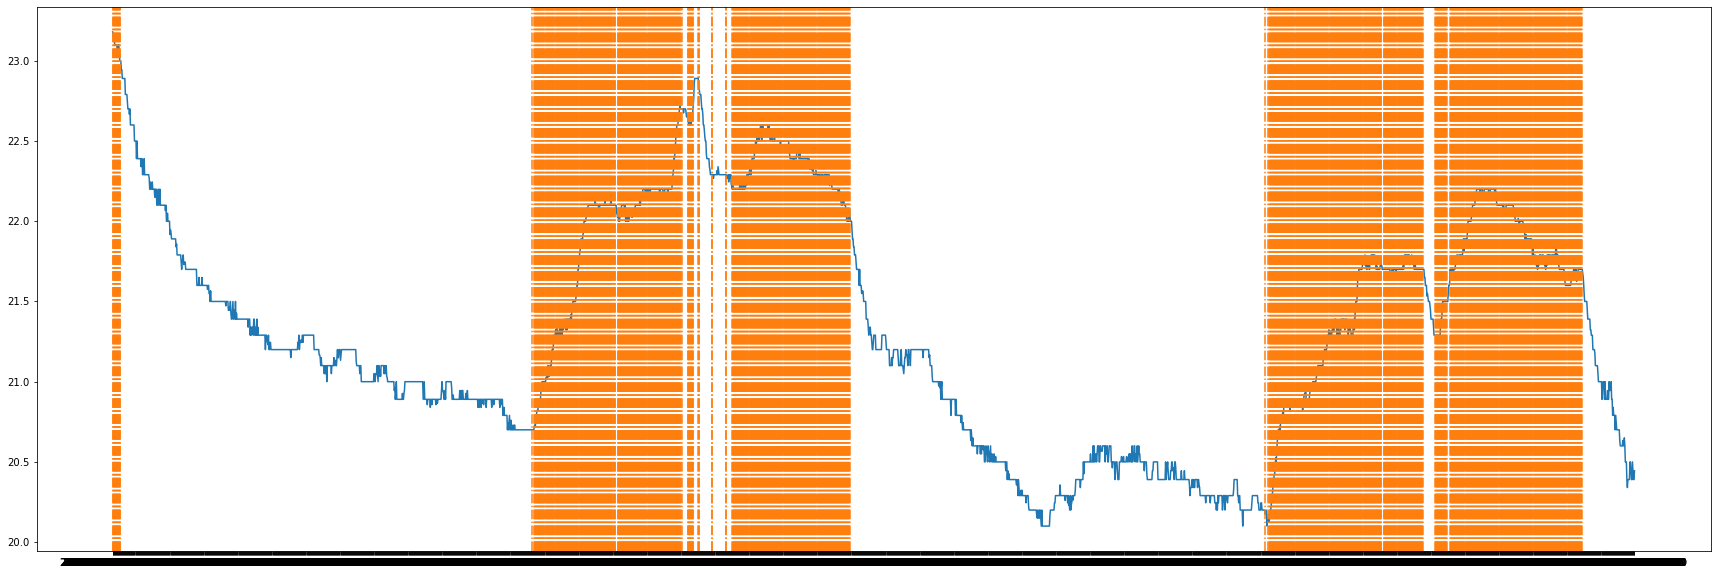

In [6]:
# plotting with exog effect
plt.figure(figsize=(30, 10))
plt.plot(df_train.loc[:3000].date, df_train.loc[:3000].Temperature)
ticks, _ = plt.xticks()

for x in df_train.loc[:3000][df_train.loc[:3000].Occupancy == 1].date.values:
    plt.axvline(x, color='C1', linestyle='-.')

In [7]:
# !pip install pystan
# !pip install prophet

import prophet

In [8]:
# Creating train and predict dataframe
df = df_train.rename(columns={'date':'ds', 'Temperature':'y'}).iloc[:3000]

train = df[['ds', 'y']]
predict = df[['ds']]

# Fitting a Prophet model
model = prophet.Prophet()

model.fit(train)
forecast = model.predict(predict)

forecast.head()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-02-04 17:51:00,22.153423,22.946935,23.204753,22.153423,22.153423,0.920318,0.920318,0.920318,0.920318,0.920318,0.920318,0.0,0.0,0.0,23.073740
1,2015-02-04 17:51:59,22.151468,22.932811,23.188761,22.151468,22.151468,0.912177,0.912177,0.912177,0.912177,0.912177,0.912177,0.0,0.0,0.0,23.063645
2,2015-02-04 17:53:00,22.149447,22.923997,23.192419,22.149447,22.149447,0.903719,0.903719,0.903719,0.903719,0.903719,0.903719,0.0,0.0,0.0,23.053166
3,2015-02-04 17:54:00,22.147459,22.927194,23.174788,22.147459,22.147459,0.895360,0.895360,0.895360,0.895360,0.895360,0.895360,0.0,0.0,0.0,23.042819
4,2015-02-04 17:55:00,22.145471,22.901792,23.159089,22.145471,22.145471,0.886962,0.886962,0.886962,0.886962,0.886962,0.886962,0.0,0.0,0.0,23.032433


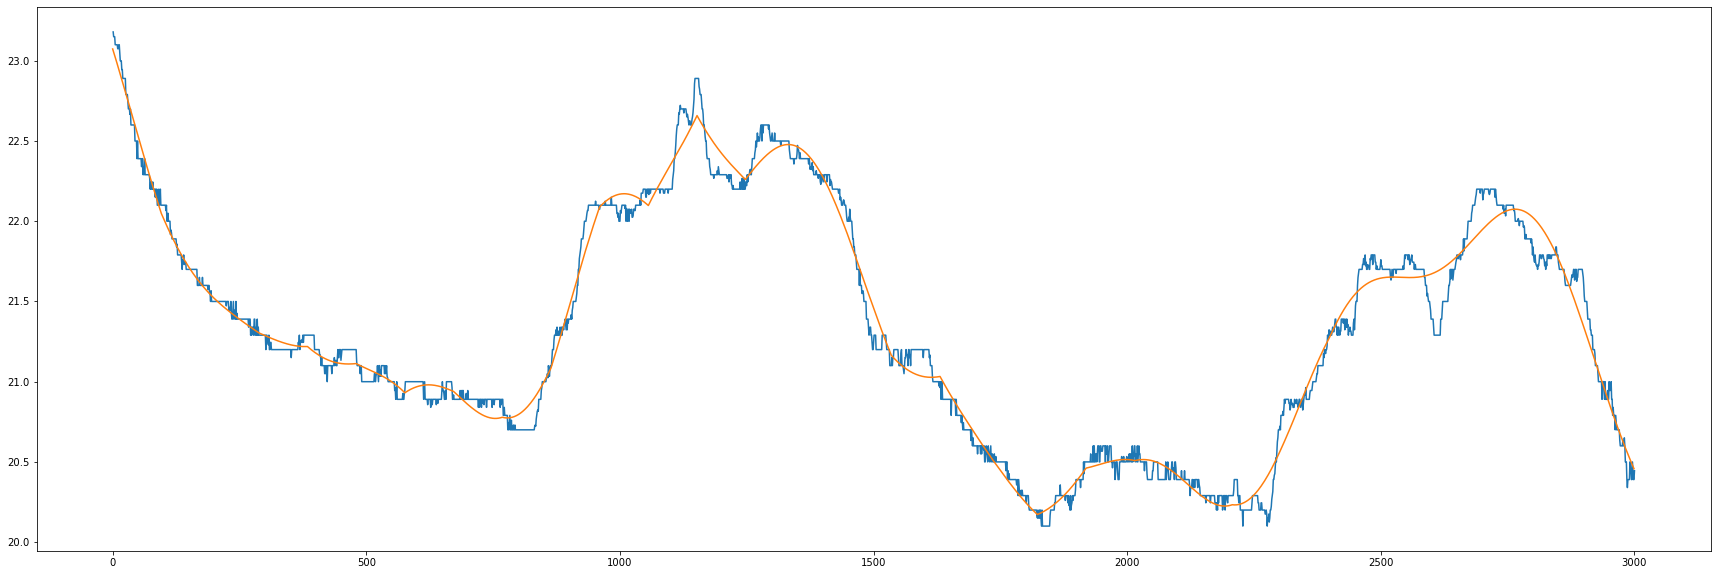

In [9]:
# plotting the actual and forecast values
plt.figure(figsize=(30, 10))

plt.plot(train.y)
plt.plot(forecast.yhat)

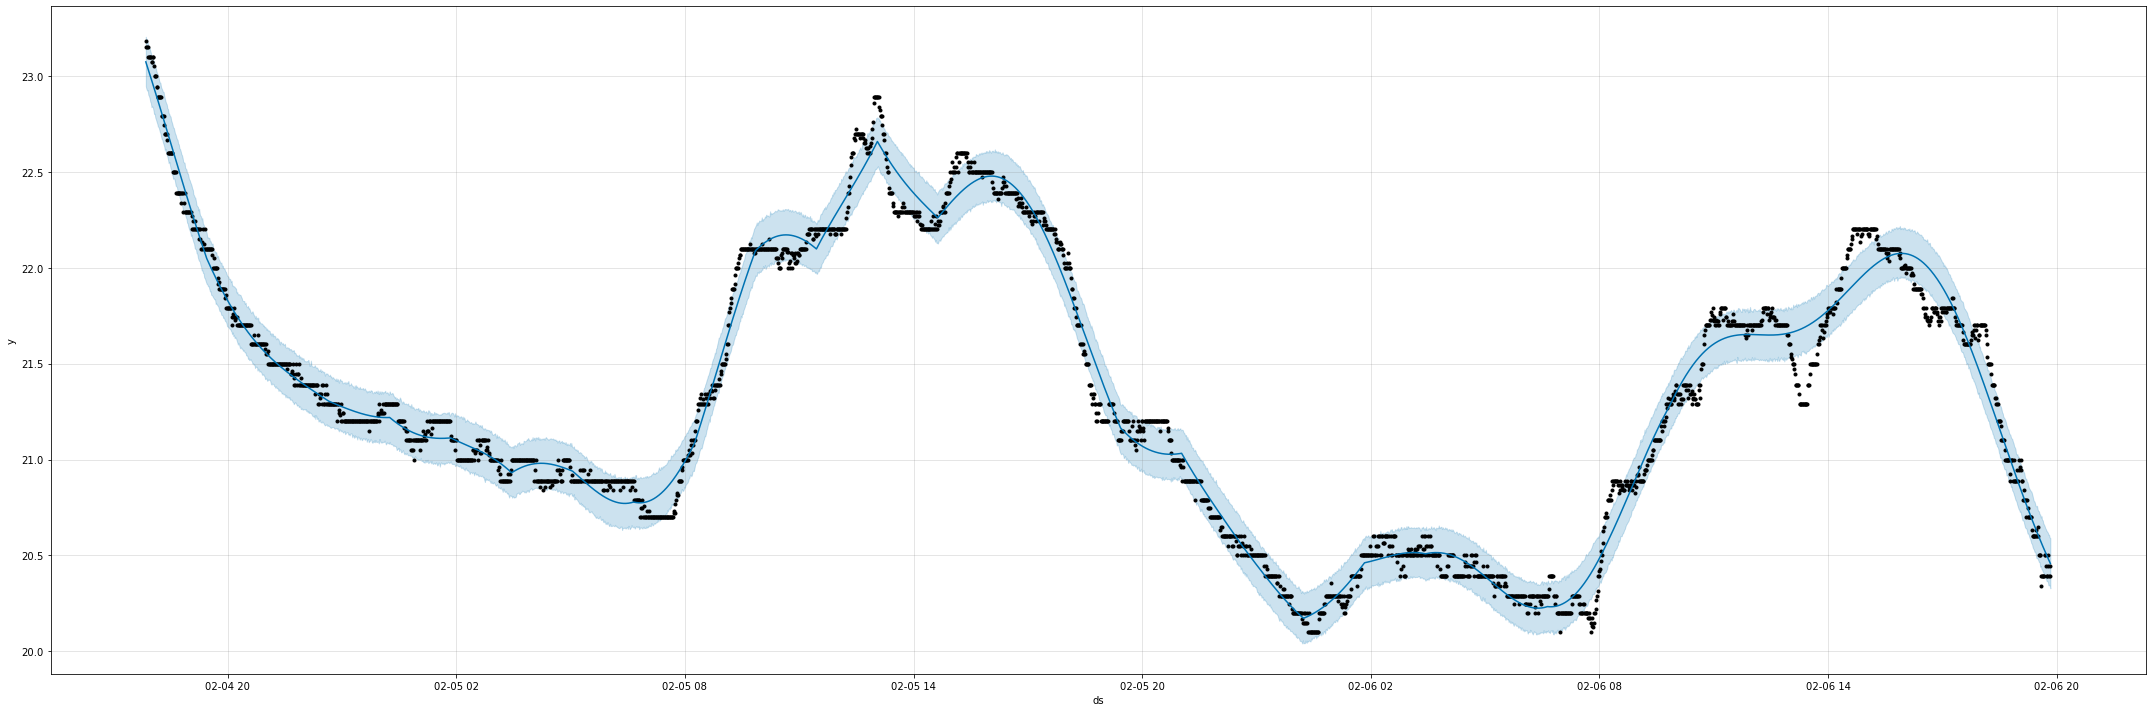

In [10]:
# Plotting the generated forecast
model.plot(forecast, uncertainty=True, figsize=(30, 10));

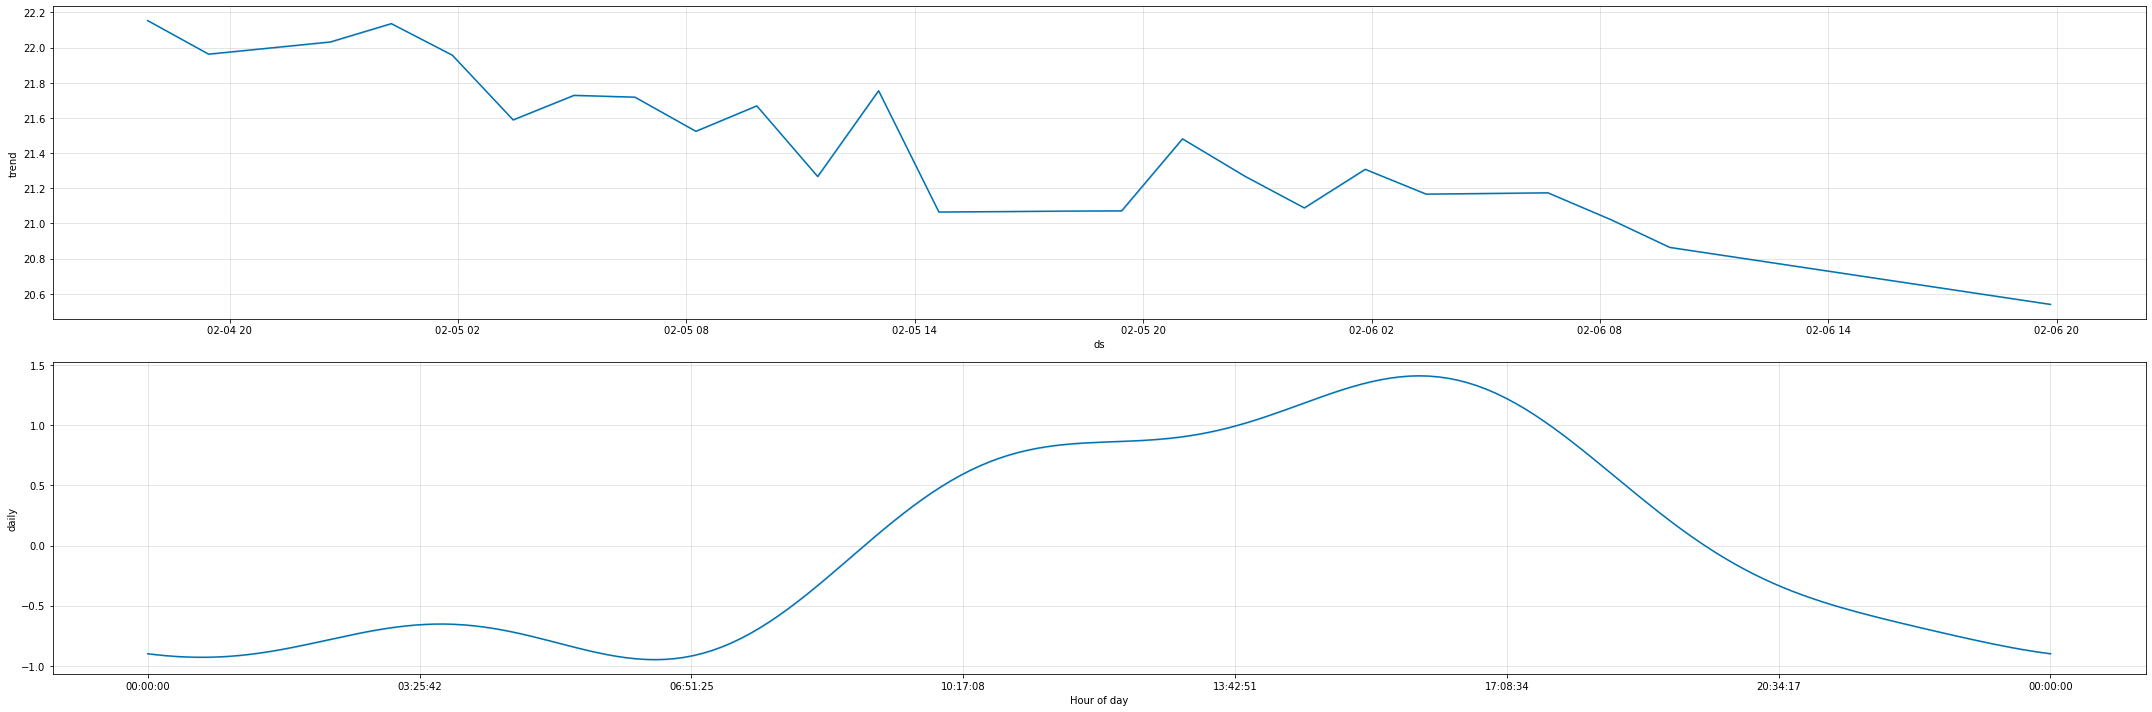

In [11]:
# Plotting the forecast components.
model.plot_components(forecast, figsize=(30, 10));

### Adicionando outras variáveis:

In [12]:
# Creating train and predict dataframe
df = df_train.rename(columns={'date':'ds', 'Temperature':'y', 'Occupancy': 'x1'}).iloc[:3000]

train = df[['ds', 'y', 'x1']]
predict = df[['ds', 'x1']]

# Fitting a Prophet model
model = prophet.Prophet()

model.add_regressor('x1')

model.fit(train)
forecast = model.predict(predict)

forecast.head()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,x1,x1_lower,x1_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-02-04 17:51:00,22.102125,23.016925,23.254649,22.102125,22.102125,1.033235,1.033235,1.033235,0.914416,...,0.118819,0.118819,0.118819,0.118819,0.118819,0.118819,0.0,0.0,0.0,23.135359
1,2015-02-04 17:51:59,22.099680,23.004276,23.258138,22.099680,22.099680,1.026235,1.026235,1.026235,0.907416,...,0.118819,0.118819,0.118819,0.118819,0.118819,0.118819,0.0,0.0,0.0,23.125915
2,2015-02-04 17:53:00,22.097153,23.001961,23.243760,22.097153,22.097153,1.018960,1.018960,1.018960,0.900141,...,0.118819,0.118819,0.118819,0.118819,0.118819,0.118819,0.0,0.0,0.0,23.116113
3,2015-02-04 17:54:00,22.094668,22.975740,23.228999,22.094668,22.094668,1.011766,1.011766,1.011766,0.892948,...,0.118819,0.118819,0.118819,0.118819,0.118819,0.118819,0.0,0.0,0.0,23.106434
4,2015-02-04 17:55:00,22.092182,22.962938,23.220931,22.092182,22.092182,1.004537,1.004537,1.004537,0.885718,...,0.118819,0.118819,0.118819,0.118819,0.118819,0.118819,0.0,0.0,0.0,23.096719


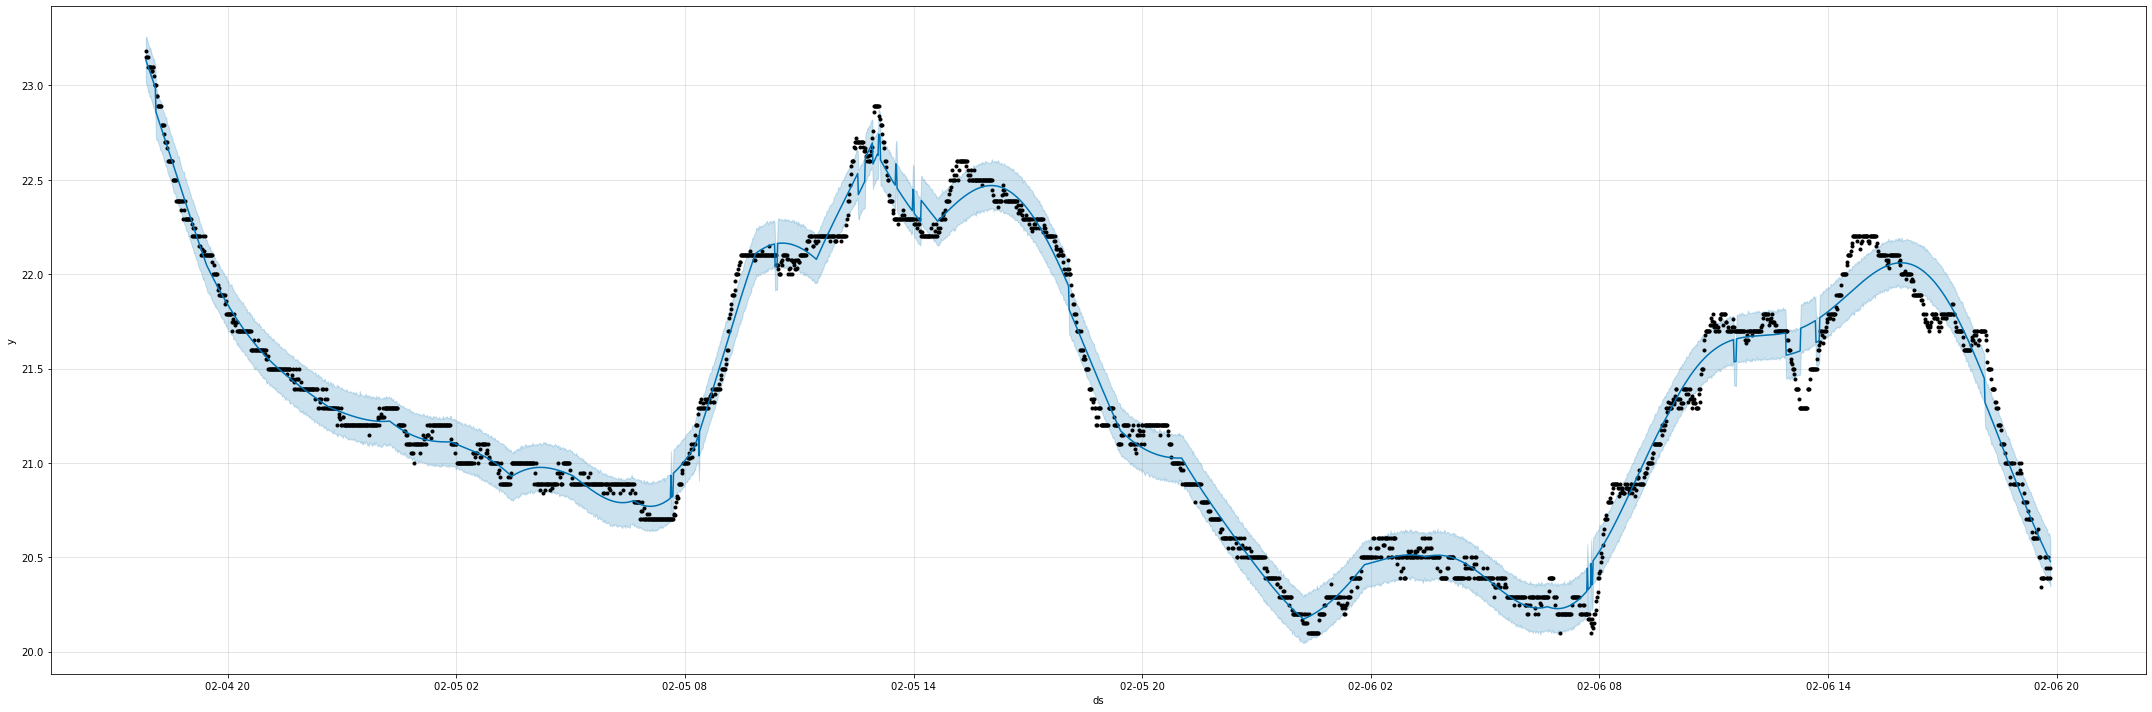

In [13]:
# Plotting the generated forecast
model.plot(forecast, uncertainty=True, figsize=(30, 10));

# To Be Continued ..

https://towardsdatascience.com/an-overview-of-time-series-forecasting-models-a2fa7a358fcb